In [ ]:
import pandas as pd

df = pd.read_csv('dataset_traffic_accident_prediction1.csv')

df.head()


,Weather,Road_Type,Time_of_Day,Traffic_Density,Speed_Limit,Number_of_Vehicles,Driver_Alcohol,Accident_Severity,Road_Condition,Vehicle_Type,Driver_Age,Driver_Experience,Road_Light_Condition,Accident
0,Rainy,City Road,Morning,1.0,100.0,5.0,0.0,NaN,Wet,Car,51.0,48.0,Artificial Light,0.0
1,Clear,Rural Road,Night,NaN,120.0,3.0,0.0,Moderate,Wet,Truck,49.0,43.0,Artificial Light,0.0
2,Rainy,Highway,Evening,1.0,60.0,4.0,0.0,Low,Icy,Car,54.0,52.0,Artificial Light,0.0
3,Clear,City Road,Afternoon,2.0,60.0,3.0,0.0,Low,Under Construction,Bus,34.0,31.0,Daylight,0.0
4,Rainy,Highway,Morning,1.0,195.0,11.0,0.0,Low,Dry,Car,62.0,55.0,Artificial Light,1.0


In [ ]:
print(df.info())

print("\nMissing values in each column:\n", df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840 entries, 0 to 839
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Weather               798 non-null    object 
 1   Road_Type             798 non-null    object 
 2   Time_of_Day           798 non-null    object 
 3   Traffic_Density       798 non-null    float64
 4   Speed_Limit           798 non-null    float64
 5   Number_of_Vehicles    798 non-null    float64
 6   Driver_Alcohol        798 non-null    float64
 7   Accident_Severity     798 non-null    object 
 8   Road_Condition        798 non-null    object 
 9   Vehicle_Type          798 non-null    object 
 10  Driver_Age            798 non-null    float64
 11  Driver_Experience     798 non-null    float64
 12  Road_Light_Condition  798 non-null    object 
 13  Accident              798 non-null    float64
dtypes: float64(7), object(7)
memory usage: 92.0+ KB
None

Missing values in ea

In [ ]:
print(df.describe())

print("Duplicate rows:", df.duplicated().sum())


       Traffic_Density  Speed_Limit  Number_of_Vehicles  Driver_Alcohol  \
count       798.000000   798.000000          798.000000      798.000000   
mean          1.001253    71.050125            3.286967        0.160401   
std           0.784894    32.052458            2.017267        0.367208   
min           0.000000    30.000000            1.000000        0.000000   
25%           0.000000    50.000000            2.000000        0.000000   
50%           1.000000    60.000000            3.000000        0.000000   
75%           2.000000    80.000000            4.000000        0.000000   
max           2.000000   213.000000           14.000000        1.000000   

       Driver_Age  Driver_Experience    Accident  
count  798.000000         798.000000  798.000000  
mean    43.259398          38.981203    0.299499  
std     15.129856          15.273201    0.458326  
min     18.000000           9.000000    0.000000  
25%     30.000000          26.000000    0.000000  
50%     43.000000 

In [ ]:
print(df.columns)


Index(['Weather', 'Road_Type', 'Time_of_Day', 'Traffic_Density', 'Speed_Limit',
       'Number_of_Vehicles', 'Driver_Alcohol', 'Accident_Severity',
       'Road_Condition', 'Vehicle_Type', 'Driver_Age', 'Driver_Experience',
       'Road_Light_Condition', 'Accident'],
      dtype='object')


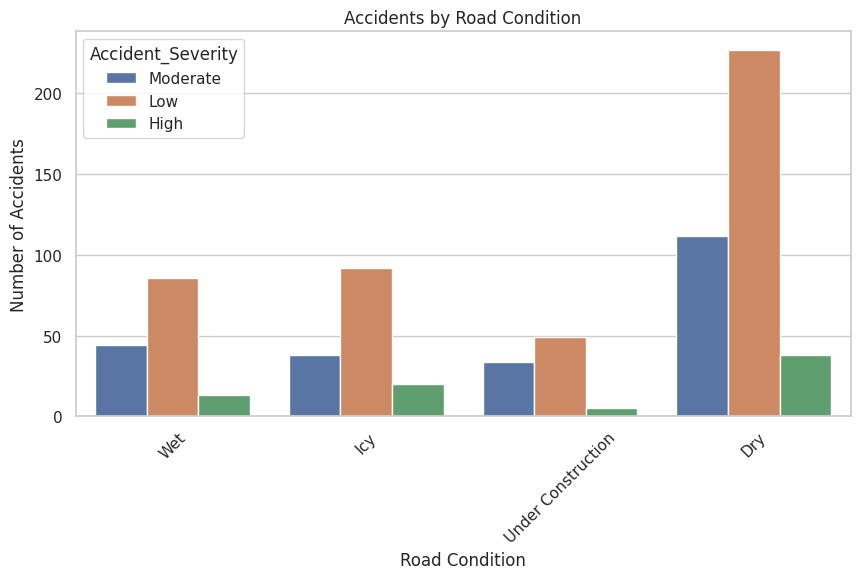

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Road_Condition', hue='Accident_Severity')
plt.title('Accidents by Road Condition')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


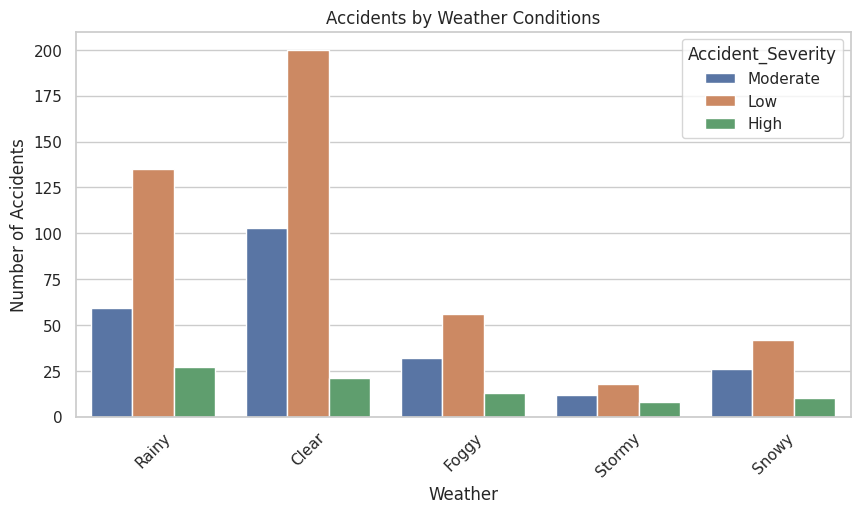

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Weather', hue='Accident_Severity')
plt.title('Accidents by Weather Conditions')
plt.xlabel('Weather')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


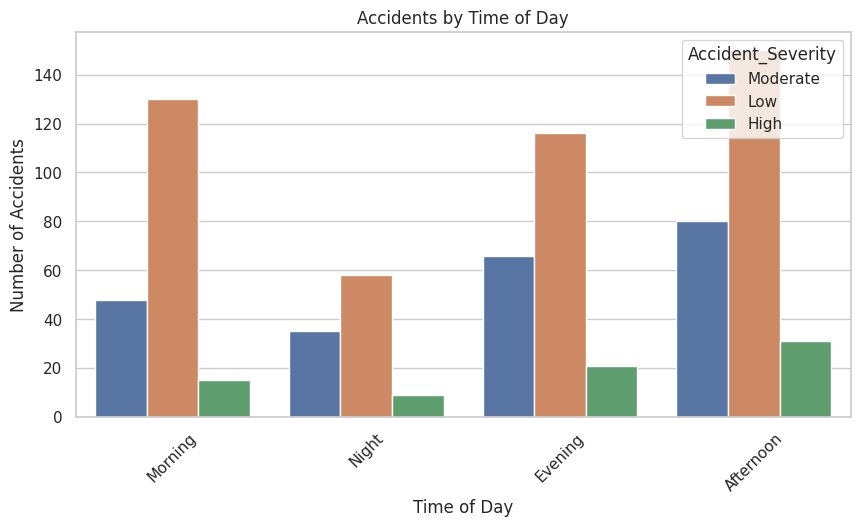

In [ ]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Time_of_Day', hue='Accident_Severity')
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.show()


<ipython-input-21-cee2e76cca00>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hotspot_counts.values, y=hotspot_counts.index, palette="rocket")


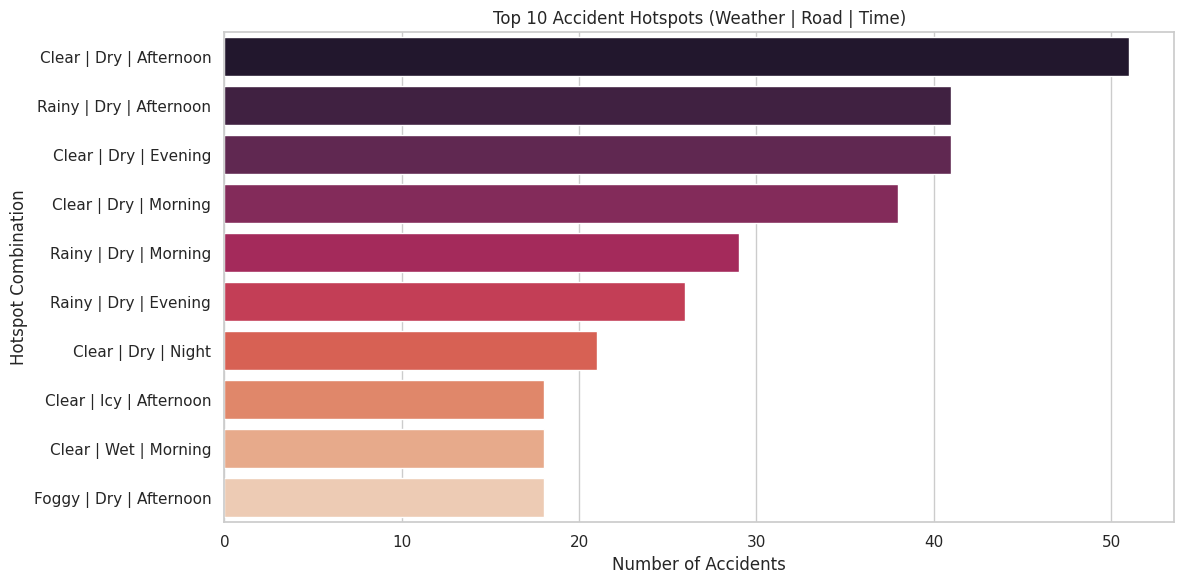

In [ ]:
df['Hotspot_Combo'] = df['Weather'] + ' | ' + df['Road_Condition'] + ' | ' + df['Time_of_Day']

hotspot_counts = df['Hotspot_Combo'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=hotspot_counts.values, y=hotspot_counts.index, palette="rocket")
plt.title('Top 10 Accident Hotspots (Weather | Road | Time)')
plt.xlabel('Number of Accidents')
plt.ylabel('Hotspot Combination')
plt.tight_layout()
plt.show()


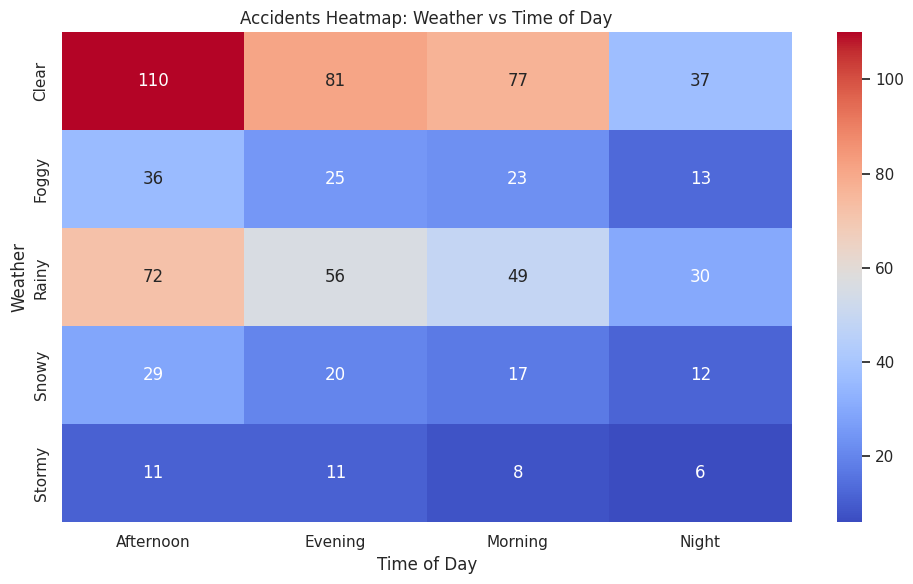

In [ ]:
pivot = df.pivot_table(index='Weather', columns='Time_of_Day', values='Accident', aggfunc='count')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt='g', cmap='coolwarm')
plt.title('Accidents Heatmap: Weather vs Time of Day')
plt.ylabel('Weather')
plt.xlabel('Time of Day')
plt.tight_layout()
plt.show()


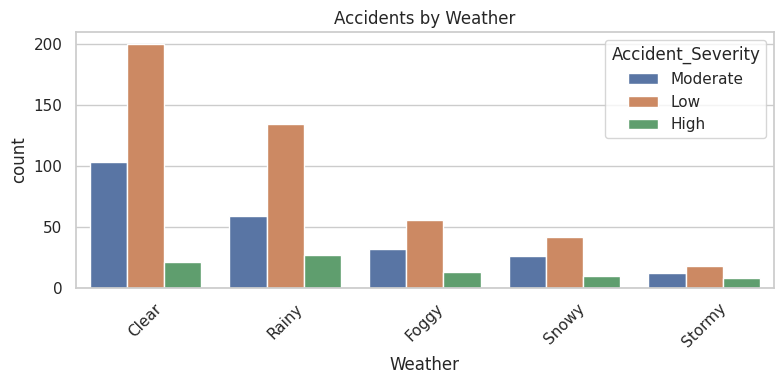

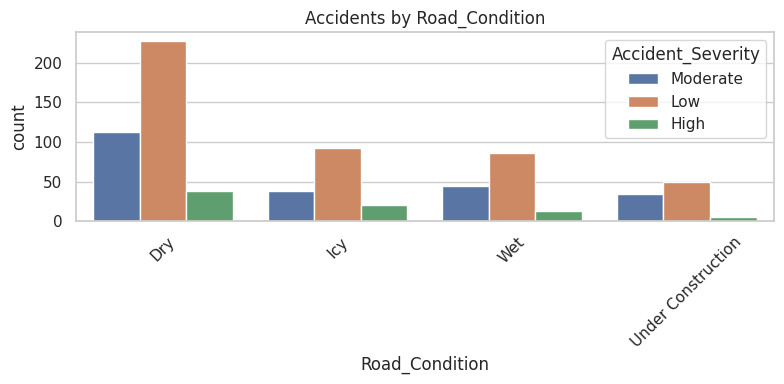

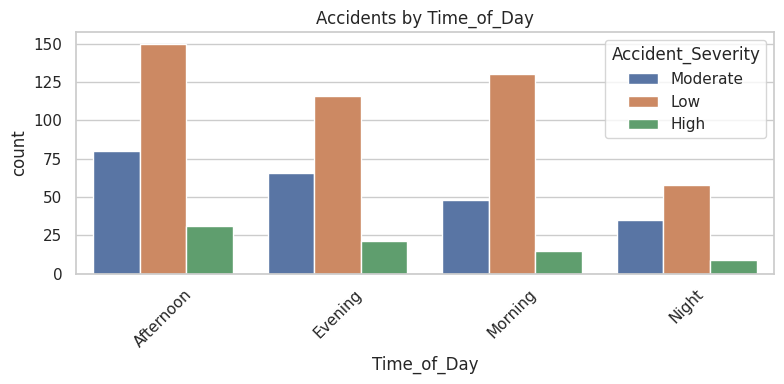

In [ ]:
factors = ['Weather', 'Road_Condition', 'Time_of_Day']

for factor in factors:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=factor, order=df[factor].value_counts().index, hue='Accident_Severity')
    plt.title(f'Accidents by {factor}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
